In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as ppt


## 1. Split the test features and label

In [2]:
heart_diseases_data=pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/refs/heads/master/data/heart-disease.csv")
heart_diseases_data.head()

X=heart_diseases_data.drop("target",axis=1)
X.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [3]:
Y= heart_diseases_data["target"];
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

** Split the data into test and training set

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [5]:
X_train.shape , X_test.shape , Y_train.shape, Y_test.shape

((242, 13), (61, 13), (242,), (61,))

## Making all value numerical 

In [6]:
car_sale_data=pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/refs/heads/master/data/car-sales-extended.csv");
car_sale_data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [7]:
len(car_sale_data)

1000

In [8]:
car_sale_data.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [9]:
#split the data in train and test
X_car= car_sale_data.drop("Price",axis=1);
y_car= car_sale_data["Price"]


In [10]:
#split into training and test

X_car_train,X_car_test,y_car_train,y_car_test= train_test_split(X_car,y_car,test_size=0.2)

In [11]:
#convert categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer = ColumnTransformer([(
    "one_hot",
    one_hot,
    categorical_features
)],remainder="passthrough")

transformed_X =transformer.fit_transform(X_car);
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [12]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [13]:
dummies_data = pd.get_dummies(car_sale_data[["Make","Colour","Doors"]])

In [14]:

dummies_data.head()

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False


In [15]:
# now fit it into the model
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor();

X_c_train,X_c_test,Y_c_train,Y_c_test= train_test_split(transformed_X, y_car, test_size=0.2)

model.fit(X_c_train,y_car_train);
model


RandomForestRegressor()

In [16]:
model.score(X_c_test,Y_c_test)

-0.1542892110122176

## What if we have a missing values 

In [17]:
 car_sale_missing_data= pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/refs/heads/master/data/car-sales-extended-missing-data.csv");

car_sale_missing_data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [18]:
car_sale_missing_data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

## Option 1 : Fill using Pandas

In [19]:
car_sale_missing_data["Make"]=car_sale_missing_data["Make"].fillna("missing")
car_sale_data["Colour"]= car_sale_missing_data["Colour"].fillna("missing")
car_sale_missing_data["Odometer (KM)"]=car_sale_missing_data["Odometer (KM)"].fillna(car_sale_missing_data["Odometer (KM)"].mean() )
car_sale_missing_data["Doors"]=car_sale_missing_data["Doors"].fillna(4)

car_sale_missing_data.isna().sum()

Make              0
Colour           50
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [20]:
car_sale_missing_data = car_sale_missing_data.dropna()

In [21]:
len(car_sale_missing_data)

904

In [22]:
X=car_sale_missing_data.drop("Price",axis=1);
y=car_sale_missing_data["Price"]

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer = ColumnTransformer([(
    "one_hot",
    one_hot,
    categorical_features
)],remainder="passthrough")

transformed_X =transformer.fit_transform(car_sale_missing_data);
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [24]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
900,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0,5716.0
901,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
902,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0,4001.0


### Option 2 : With Sklearn

In [25]:
 car_sale_missing_data= pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/refs/heads/master/data/car-sales-extended-missing-data.csv");
car_sale_missing_data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [26]:
car_sale_missing_data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [27]:
car_sale_missing_data.dropna(subset=["Price"],inplace=True)


In [28]:
X=car_sale_missing_data.drop("Price", axis=1)
y=car_sale_missing_data["Price"]

np.random.seed(42);
X_train, X_test , y_train,y_test= train_test_split(X,y,test_size=0.2)

In [29]:

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

cat_imputer = SimpleImputer(strategy="constant", fill_value="missing");

door_imputer = SimpleImputer(strategy="constant" , fill_value=4)

num_imputer = SimpleImputer(strategy="mean")


In [30]:
cat_feature = ["Make", "Colour"];
door_feature = ["Doors"];
numerical_feature = ["Odometer (KM)"]

In [31]:
imputer = ColumnTransformer([
    ("cat_imputer",cat_imputer, cat_feature),
    ("door_imputer", door_imputer,door_feature),
    ("num_imputer",num_imputer,numerical_feature)
])

In [32]:
filled_X_train = imputer.fit_transform(X_train)
filled_X_test= imputer.fit_transform(X_test)

filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [33]:
filled_X_train_df= pd.DataFrame(filled_X_train, columns=["Make", "Colour","Doors","Odometer (KM)"])
filled_X_train_df.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

# Choosing the right algorithm for our problem 

In [34]:
from sklearn.datasets import fetch_california_housing
housing_data = fetch_california_housing()
housing_data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [35]:
housing_df= pd.DataFrame(housing_data["data"],columns=housing_data["feature_names"]);
housing_df["target"]=pd.Series(housing_data["target"])
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [36]:
len(housing_df)

20640

In [37]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X=housing_df.drop("target",axis=1);
y=housing_df["target"]

X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2)

In [38]:
model=Ridge()
forest_model=RandomForestRegressor()
model.fit(X_train,y_train)
forest_model.fit(X_train,y_train)
print(model.score(X_test,y_test))
forest_model.score(X_test,y_test)

0.5758549611440128


0.8065734772187598

# Choosing for Classification 

In [39]:
heart_diseases_data=pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/refs/heads/master/data/heart-disease.csv")
heart_diseases_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [40]:
from sklearn.svm import LinearSVC

In [41]:
np.random.seed(42)
X = heart_diseases_data.drop("target", axis=1)
y = heart_diseases_data["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [42]:
clf=LinearSVC(max_iter=1000, dual="auto")
clf.fit(X_train,y_train);

print(clf.score(X_test,y_test))
print(clf.score(X_train,y_train))

0.8688524590163934
0.8553719008264463


In [43]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8360655737704918

## 3. Fit the model on our data 

### 3.1 Fitting Model to Data

In [44]:
# Import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_diseases_data.drop("target", axis=1)
y = heart_diseases_data["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model (on the training set)
clf = RandomForestClassifier(n_estimators=100)

# Call the fit method on the model and pass it training data
clf.fit(X_train, y_train)

# Check the score of the model (on the test set)
clf.score(X_test, y_test)

0.8524590163934426

### 3.2 Making Prediction

In [45]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [46]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [47]:
y_preds = clf.predict(X_test)
np.mean(y_preds==y_test)

0.8524590163934426

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

In [49]:
clf.score(X_test,y_test)

0.8524590163934426

In [50]:
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [51]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Split the data into features (X) and labels (y)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [52]:
y_preds[:5]


array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  ])

In [53]:
np.array(y_test[:5])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   ])

In [54]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.32659871732073664

# 4 . Evaluiating a machine learning model

In [55]:
# Import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_diseases_data.drop("target", axis=1)
y = heart_diseases_data["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model (on the training set)
clf = RandomForestClassifier(n_estimators=100)

# Call the fit method on the model and pass it training data
clf.fit(X_train, y_train);

### 4.1 With `score` method 

In [56]:
clf.score(X_train,y_train)

1.0

In [57]:
clf.score(X_test,y_test)

0.8524590163934426

In [58]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Split the data into features (X) and labels (y)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train);

In [59]:
model.score(X_test,y_test)

0.8065734772187598

### 4.2 Evaluation a model using the scoring parameter

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_diseases_data.drop("target", axis=1)
y = heart_diseases_data["target"]

clf = RandomForestClassifier(n_estimators=100)

In [61]:
np.random.seed(42)
cv_acc=cross_val_score(clf,X,y,cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [62]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


### 4.1 Classificaion model evaluation metrics

### Accuray

In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_diseases_data.drop("target", axis=1)
y = heart_diseases_data["target"]

clf = RandomForestClassifier(n_estimators=100)

In [64]:
np.random.seed(42)
cv_acc=cross_val_score(clf,X,y,cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [65]:
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


**Area under the receiver operating characterstics curve (AUC/ROC)**

In [66]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2);

In [67]:
from sklearn.metrics import roc_curve

clf.fit(X_train,y_train);
y_probs= clf.predict_proba(X_test)
y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [68]:
y_probs_postive= y_probs[:,1]
y_probs_postive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [69]:
fpr,tpr,thresholds= roc_curve(y_test,y_probs_postive)

fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

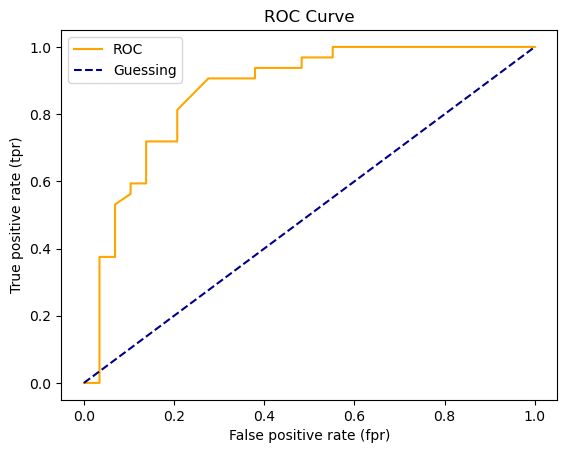

In [70]:
 # create a function for plotting ROC  curves
import matplotlib.pyplot as  plt

def plot_roc_curve(fpr,trp):
    plt.plot(fpr,tpr,color="orange",label="ROC");
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")
    plt.xlabel("False positive rate (fpr)");
    plt.ylabel("True positive rate (tpr)");
    plt.title("ROC Curve")
    plt.legend();
    plt.show()


plot_roc_curve(fpr,tpr);

In [71]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_postive)

0.8669181034482759

**Confusion Matrix**

In [72]:
from sklearn.metrics import confusion_matrix
y_preds=clf.predict(X_test);
confusion_matrix(y_test,y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [73]:
pd.crosstab(y_test,y_preds,rownames=["Actual Labels"],colnames=["Predicted lables"])

Predicted lables,0,1
Actual Labels,,
0,23,6
1,6,26


<Axes: >

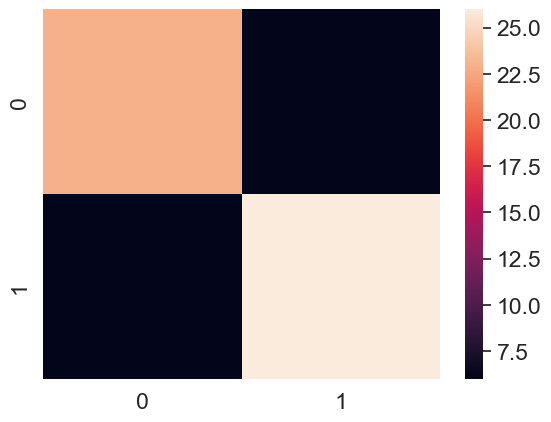

In [74]:
import seaborn as sns

sns.set(font_scale=1.5)

conf_mat= confusion_matrix(y_test,y_preds);

sns.heatmap(conf_mat)

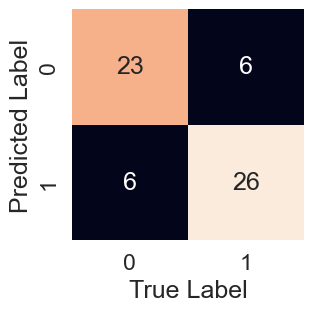

In [75]:
def plot_conf_mat(conf_mat):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(conf_mat,
                  annot=True,
                  cbar=False)
    plt.xlabel("True Label");
    plt.ylabel("Predicted Label");

plot_conf_mat(conf_mat)

*Classification Report*

In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



## 4.2.2 Regression model evaluation metrics

### 1. R^2 or Cofficient of Determination

In [77]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42);

X=housing_df.drop("target",axis=1);
y=housing_df["target"];

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

model=RandomForestRegressor();
model.fit(X_train,y_train);



In [78]:
model.score(X_test,y_test)

0.8065734772187598

### 2. Mean Absolute Error

In [79]:
from sklearn.metrics import mean_absolute_error

y_preds= model.predict(X_test);

mae= mean_absolute_error(y_test,y_preds);
mae

0.32659871732073664

In [80]:
df=pd.DataFrame(data={
    "actual values":y_test,
    "predicted values":y_preds
})
df["Differences"]=df["actual values"]-df["predicted values"]
df

,actual values,predicted values,Differences
20046,0.47700,0.493840,-0.016840
3024,0.45800,0.754940,-0.296940
15663,5.00001,4.928596,0.071414
20484,2.18600,2.543160,-0.357160
9814,2.78000,2.331760,0.448240
...,...,...,...
15362,2.63300,2.220380,0.412620
16623,2.66800,1.947760,0.720240
18086,5.00001,4.836378,0.163632
2144,0.72300,0.717820,0.005180


### 3. Meas square errror 

In [81]:
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y_test,y_preds);
mse

0.2534678520824551

## 4.23 Scoring Parameter

In [82]:
  from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=heart_diseases_data.drop("target",axis=1);
y=heart_diseases_data["target"];


clf= RandomForestClassifier(n_estimators=100)

In [83]:
np.random.seed(42)
cv_acc= cross_val_score(clf,X,y,cv=5,scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [84]:
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")


The cross-validated accuracy is: 82.48%


In [85]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [86]:
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
print(f"The cross-validated precision is: {np.mean(cv_precision):.2f}")

The cross-validated precision is: 0.83


In [87]:
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
print(f"The cross-validated recall is: {np.mean(cv_recall):.2f}")

The cross-validated recall is: 0.85


In [88]:
np.random.seed(42)
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
print(f"The cross-validated F1 score is: {np.mean(cv_f1):.2f}")

The cross-validated F1 score is: 0.84


In [89]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators=100)

In [90]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring="r2")
print(f"The cross-validated R^2 score is: {np.mean(cv_r2):.2f}")

The cross-validated R^2 score is: 0.65


In [91]:
np.random.seed(42)
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
print(f"The cross-validated MAE score is: {np.mean(cv_mae):.2f}")

The cross-validated MAE score is: -0.47


In [92]:
np.random.seed(42)
cv_mse = cross_val_score(model, 
                         X, 
                         y, 
                         cv=5,
                         scoring="neg_mean_squared_error")
print(f"The cross-validated MSE score is: {np.mean(cv_mse):.2f}");

The cross-validated MSE score is: -0.43


### 4.3 Using different evalution metrics as sk-learn functions

In [94]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = heart_diseases_data.drop("target", axis=1)
y = heart_diseases_data["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
clf = RandomForestClassifier()

# Fit model
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_test)


In [95]:
print("Classifier metrics on the test set")
print(f"Accurracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accurracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384616


**regression evalution model**

In [96]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
model = RandomForestRegressor()

# Fit model
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate model using evaluation functions
print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression metrics on the test set
R2 score: 0.8065734772187598
MAE: 0.32659871732073664
MSE: 0.2534678520824551


In [97]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

In [102]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict    

In [103]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

heart_diseases_suffle=heart_diseases_data.sample(frac=1);

X=heart_diseases_suffle.drop("target",axis=1);
y=heart_diseases_suffle["target"]

train_split= round(0.7*len(heart_diseases_suffle))
valid_split= round(train_split+0.15*len(heart_diseases_suffle))
X_train,y_train=X[:train_split],y[:train_split]
x_valid,y_valid= X[train_split:valid_split],y[train_split:valid_split];
X_test,y_test=X[valid_split:],y[valid_split:];


clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(x_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [118]:
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf_2.predict(x_valid)

# Evaluate the classifier on validation set
clf_2_baseline = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 93.33%
Precision: 0.92
Recall: 0.96
F1 score: 0.94


{'accuracy': 0.84, 'precision': 0.85, 'recall': 0.88, 'f1': 0.86}

In [107]:
clf_3 = RandomForestClassifier(n_estimators=100,max_depth=5)
clf_3.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf_3.predict(x_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 84.44%
Precision: 0.85
Recall: 0.88
F1 score: 0.86


{'accuracy': 0.84, 'precision': 0.85, 'recall': 0.88, 'f1': 0.86}

### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [108]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42);

X=heart_diseases_suffle.drop("target",axis=1);
y=heart_diseases_suffle["target"];
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2);


clf=RandomForestClassifier(n_jobs=1)



rs_clf=RandomizedSearchCV(estimator=clf,
                         param_distributions=grid,
                         n_iter=10,
                         cv=5,
                         verbose=2)

rs_clf.fit(X_train,y_train)















Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.7s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

C:\Users\jeevan\OneDrive\Desktop\sample_project_1\env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jeevan\OneDrive\Desktop\sample_project_1\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jeevan\OneDrive\Desktop\sample_project_1\env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\jeevan\OneDrive\Desktop\sample_project_1\env\Lib\site-packages\sklearn\base.py", l

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [109]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [110]:
rs_y_preds=rs_clf.predict(X_test);

rs_metrics= evaluate_preds(y_test,rs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


### 4.3 Hyperparameter tuning with GridSearchCV

In [113]:
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

In [114]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heart_diseases_suffle.drop("target", axis=1)
y = heart_diseases_suffle["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2, 
                      cv=5,
                      verbose=2)

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

C:\Users\jeevan\OneDrive\Desktop\sample_project_1\env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jeevan\OneDrive\Desktop\sample_project_1\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jeevan\OneDrive\Desktop\sample_project_1\env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\jeevan\OneDrive\Desktop\sample_project_1\env\Lib\site-packages\sklearn\base.py", l

In [115]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [116]:
gs_y_preds= gs_clf.predict(X_test);

gs_metrics =evaluate_preds(y_test,gs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


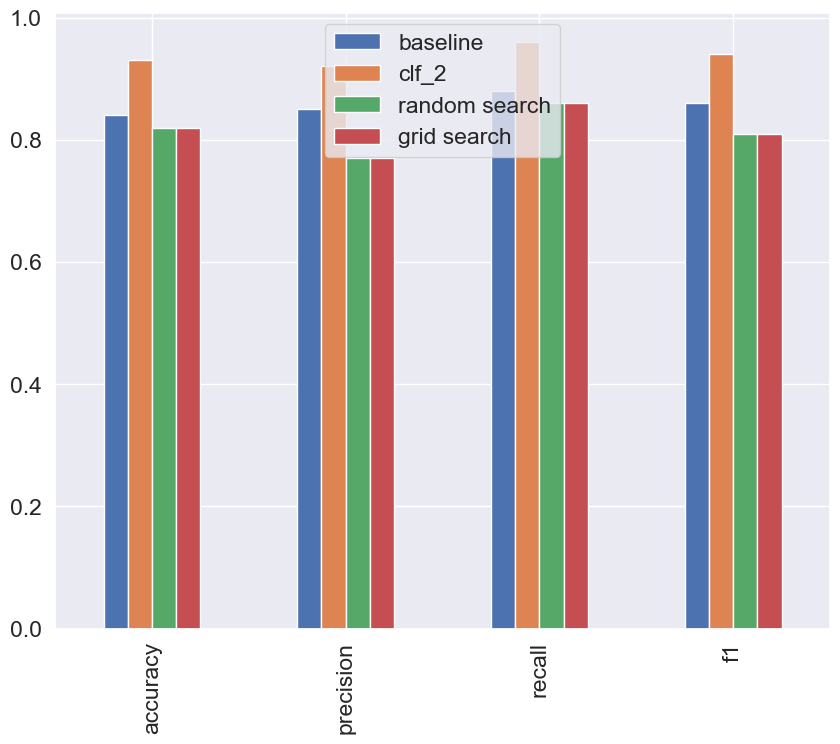

In [119]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_baseline,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10, 8));

# 6 Saving and Loading Models

### Pickle 

In [120]:
import pickle
pickle.dump(gs_clf,open("gs_random_forest_model_1.pkl","wb"))

In [121]:
#load a saved model

loaded_pickle_model=pickle.load(open("gs_random_forest_model_1.pkl","rb"))


In [123]:
pickle_y_preds=loaded_pickle_model.predict(X_test);
evaluate_preds(y_test,pickle_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

### Joblib

In [124]:
from joblib import dump,load

dump(gs_clf,filename="gs_random_forest.joblib")

['gs_random_forest.joblib']

In [125]:
loaded_job_model= load(filename="gs_random_forest.joblib")

In [ ]:
job_y_preds=loaded_job_model.predict(X_test);
evaluate_preds(y_test,job_y_preds)